In [2]:
from net import Net
import torch
from torch.autograd import grad
import os
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from math import pi


In [3]:
data = scipy.io.loadmat('./result/burgers_shock.mat')

In [4]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Sep 20 16:38:22 2017',
 '__version__': '1.0',
 '__globals__': [],
 'x': array([[-1.        ],
        [-0.99215686],
        [-0.98431373],
        [-0.97647059],
        [-0.96862745],
        [-0.96078431],
        [-0.95294118],
        [-0.94509804],
        [-0.9372549 ],
        [-0.92941176],
        [-0.92156863],
        [-0.91372549],
        [-0.90588235],
        [-0.89803922],
        [-0.89019608],
        [-0.88235294],
        [-0.8745098 ],
        [-0.86666667],
        [-0.85882353],
        [-0.85098039],
        [-0.84313725],
        [-0.83529412],
        [-0.82745098],
        [-0.81960784],
        [-0.81176471],
        [-0.80392157],
        [-0.79607843],
        [-0.78823529],
        [-0.78039216],
        [-0.77254902],
        [-0.76470588],
        [-0.75686275],
        [-0.74901961],
        [-0.74117647],
        [-0.73333333],
        [-0.7254902 ],
        [-0.71764706],
        

In [5]:
Exact = np.real(data['usol']).T 

In [6]:
Exact

array([[ 1.22464680e-16,  2.46374492e-02,  4.92599411e-02, ...,
        -4.92599411e-02, -2.46374492e-02, -1.22464680e-16],
       [ 2.95362215e-17,  2.38801772e-02,  4.77471404e-02, ...,
        -4.77471404e-02, -2.38801772e-02, -1.08544418e-16],
       [ 1.08470836e-16,  2.31684474e-02,  4.63251758e-02, ...,
        -4.63251758e-02, -2.31684474e-02, -1.29376253e-16],
       ...,
       [ 3.57297976e-16,  6.07646192e-03,  1.21528662e-02, ...,
        -1.21528662e-02, -6.07646192e-03,  1.04877526e-16],
       [ 2.61833228e-16,  6.02971754e-03,  1.20593792e-02, ...,
        -1.20593792e-02, -6.02971754e-03,  2.17508692e-16],
       [ 9.39536897e-17,  5.98368729e-03,  1.19673204e-02, ...,
        -1.19673204e-02, -5.98368729e-03,  1.12388795e-16]])

In [7]:
 t = data['t'].flatten()[:, None]

In [8]:
x = data['x'].flatten()[:, None]

In [9]:
 X, T = np.meshgrid(x, t)  #生成二维网格

In [10]:
s_shape = X.shape   #100行256列

In [11]:
 X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))

In [12]:
    X_star = X_star.astype(np.float32) #数据转换为np
    X_star = torch.from_numpy(X_star).cuda().requires_grad_(True)  #换成tensor张量 Gpu计算，可求导X_star

In [31]:
u_star = Exact.flatten()[:, None] #精确解
u_star = u_star.astype(np.float32)
u_star = torch.from_numpy(u_star).cuda().requires_grad_(True)

In [32]:
u_star

tensor([[ 1.2246e-16],
        [ 2.4637e-02],
        [ 4.9260e-02],
        ...,
        [-1.1967e-02],
        [-5.9837e-03],
        [ 1.1239e-16]], device='cuda:0', requires_grad=True)

In [33]:
np.squeeze(t, axis=1)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [34]:
np.squeeze(x, axis=1)

array([-1.        , -0.99215686, -0.98431373, -0.97647059, -0.96862745,
       -0.96078431, -0.95294118, -0.94509804, -0.9372549 , -0.92941176,
       -0.92156863, -0.91372549, -0.90588235, -0.89803922, -0.89019608,
       -0.88235294, -0.8745098 , -0.86666667, -0.85882353, -0.85098039,
       -0.84313725, -0.83529412, -0.82745098, -0.81960784, -0.81176471,
       -0.80392157, -0.79607843, -0.78823529, -0.78039216, -0.77254902,
       -0.76470588, -0.75686275, -0.74901961, -0.74117647, -0.73333333,
       -0.7254902 , -0.71764706, -0.70980392, -0.70196078, -0.69411765,
       -0.68627451, -0.67843137, -0.67058824, -0.6627451 , -0.65490196,
       -0.64705882, -0.63921569, -0.63137255, -0.62352941, -0.61568627,
       -0.60784314, -0.6       , -0.59215686, -0.58431373, -0.57647059,
       -0.56862745, -0.56078431, -0.55294118, -0.54509804, -0.5372549 ,
       -0.52941176, -0.52156863, -0.51372549, -0.50588235, -0.49803922,
       -0.49019608, -0.48235294, -0.4745098 , -0.46666667, -0.45

In [35]:
mse_test = u_star #残差精确测试项提取

In [37]:
q=mse_test.cpu().detach().numpy().reshape(s_shape).T

In [38]:
q

array([[ 1.22464685e-16,  2.95362209e-17,  1.08470834e-16, ...,
         3.57297979e-16,  2.61833236e-16,  9.39536886e-17],
       [ 2.46374495e-02,  2.38801781e-02,  2.31684465e-02, ...,
         6.07646210e-03,  6.02971762e-03,  5.98368747e-03],
       [ 4.92599420e-02,  4.77471389e-02,  4.63251770e-02, ...,
         1.21528665e-02,  1.20593794e-02,  1.19673200e-02],
       ...,
       [-4.92599420e-02, -4.77471389e-02, -4.63251770e-02, ...,
        -1.21528665e-02, -1.20593794e-02, -1.19673200e-02],
       [-2.46374495e-02, -2.38801781e-02, -2.31684465e-02, ...,
        -6.07646210e-03, -6.02971762e-03, -5.98368747e-03],
       [-1.22464685e-16, -1.08544420e-16, -1.29376249e-16, ...,
         1.04877528e-16,  2.17508691e-16,  1.12388792e-16]], dtype=float32)

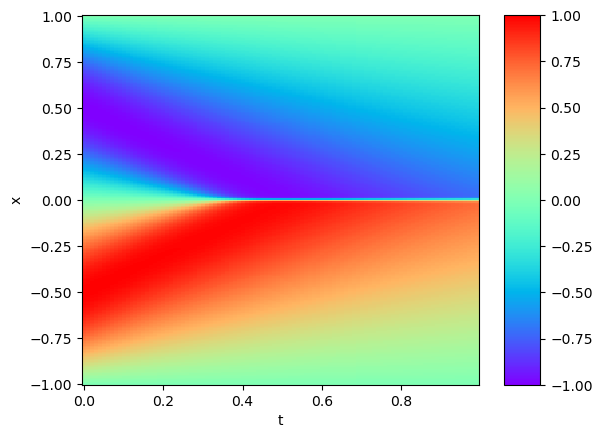

In [48]:
plt.pcolormesh(np.squeeze(t, axis=1), np.squeeze(x, axis=1),
                   mse_test.cpu().detach().numpy().reshape(s_shape).T, cmap='rainbow')
cbar = plt.colorbar(pad=0.05, aspect=10)
cbar.mappable.set_clim(-1, 1)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

12000